# 03 - Test some basic Pandas dataframe operations

This notebook tests some basic Pandas operations directly from [GitHub.dev](https://github.dev) console using Python in the browser directly 😍

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let's create some super simple Pandas Dataframe to play with. I'm going to add some benchmarks for the following:

* creating additional columns,
* getting some stats on columns like mean, or median, sum etc.,
* returning unique values,
* sorting a column.

Approach inspired by [Pandas benchmarks](https://github.com/mm-mansour/Fast-Pandas). Check it out, really nicely done!

In [ ]:
def generate_df(range=1000, size=10000, column_names=['ColumnA', 'ColumnB']):
    return pd.DataFrame(np.random.randint(1, range, (size, len(column_names))), columns=column_names)

In [4]:
sample_df = generate_df()
sample_df.describe()

,ColumnA,ColumnB
count,10000.000000,10000.000000
mean,497.888400,498.951400
std,291.040672,289.363312
min,1.000000,1.000000
25%,243.750000,246.000000
50%,497.000000,499.000000
75%,753.000000,747.000000
max,999.000000,999.000000


A sample function to create a benchmark fo a given set of functions to be run on a DataFrame:

* Calculate results for every function in a given set of functions.
* Draw a chart with results.

This function was designed with simplicity and readability first, so everybody can understand how benchmarking works in this case. Yes, it can be optimised for more serious use.

In [ ]:
import timeit, functools

def benchmark_function(df_generator, function, df_sizes, no_of_runs, no_of_samples):
    """
    Params:
    ----------
    df_generator: function, function generating a sample dataframe.
    functions: function, function to evaluate.
    df_sizes: List[int], list of DataFrame sizes used for benchmarking.
    no_of_runs: int, number of runs for timeit.repeat.
    no_of_samples: int, number of iterations for each run in timeit.repeat.
    """

    function_name = function.__name__
    function_benchmarks = []

    for df_size in df_sizes:
        print(f'Calculating results for function {function_name} using DataFrame with {df_size} elements.')

        df = df_generator(size=df_size)

        t = timeit.Timer(functools.partial(function, df))
        results = t.repeat(no_of_runs, no_of_samples)
        final_result = np.sum(results) / len(results)
        function_benchmarks.append({'size': df_size, 'time': final_result})

    return function_benchmarks


def plot_results(benchmarking_results, title):
    """
    Params:
    ----------
    benchmarking_results, List: List of results, groupped by function.
    title, string: Title used for the visualisation.
    """
    
    for results in benchmarking_results:
        function_name = results['function']
        x = [a['size'] for a in results['results']]
        y = [a['time'] for a in results['results']]
        plt.plot(x, y, marker="o", label=function_name)
    
    plt.ylabel('Benchmarked function execution time [s]')
    plt.xscale('log')
    plt.xlabel('Length of a DataFrame')
    plt.title(title)
    plt.legend()
    plt.show()

    return None


def run_benchmarks(df_generator, functions_to_evaluate, title, df_size_power=4, no_of_runs=5, no_of_samples=1000):
    """
    Params:
    ----------
    df_generator: function, function generating a sample dataframe.
    functions_to_evaluate: List[function], a list of functions to evaluate.
    title: string, used for visualisations only.
    no_of_runs: int, number of runs for timeit.repeat.
    no_of_samples: int, number of iterations for each run in timeit.repeat.
    """

    benchmarking_results = []
    df_sizes = [10 ** x for x in range(1, df_size_power + 1)]

    for func in functions_to_evaluate:
        function_name = func.__name__
        function_results = benchmark_function(df_generator, func, df_sizes, no_of_runs, no_of_samples)
        benchmarking_results.append({'function': function_name, 'results': function_results})

    plot_results(benchmarking_results, title)
    

### 1. Calculating sums of a column in a DataFrame

Calculating results for function pandas_sum using DataFrame with 10 elements.
Calculating results for function pandas_sum using DataFrame with 100 elements.
Calculating results for function pandas_sum using DataFrame with 1000 elements.
Calculating results for function pandas_sum using DataFrame with 10000 elements.
Calculating results for function pandas_sum using DataFrame with 100000 elements.
Calculating results for function pandas_sum using DataFrame with 1000000 elements.
Calculating results for function numpy_sum using DataFrame with 10 elements.
Calculating results for function numpy_sum using DataFrame with 100 elements.
Calculating results for function numpy_sum using DataFrame with 1000 elements.
Calculating results for function numpy_sum using DataFrame with 10000 elements.
Calculating results for function numpy_sum using DataFrame with 100000 elements.
Calculating results for function numpy_sum using DataFrame with 1000000 elements.
Calculating results for function numpy_v

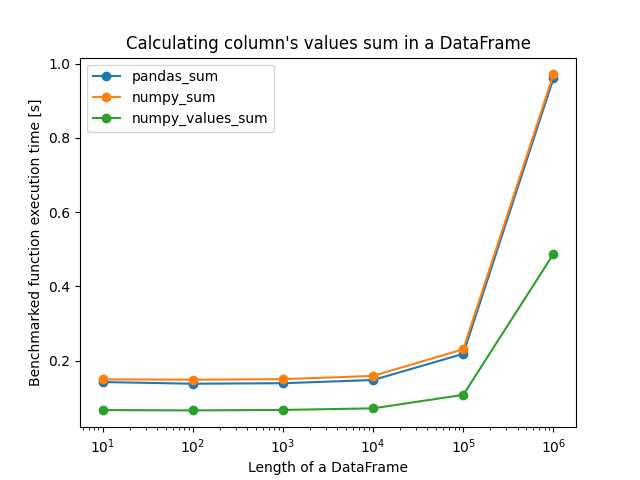

In [ ]:
def pandas_sum(df):
    return df.iloc[:, 0].sum()


def numpy_sum(df):
    return np.sum(df.iloc[:, 0])


def numpy_values_sum(df):
    return np.sum(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_sum, numpy_sum, numpy_values_sum],
    title="Calculating column's values sum in a DataFrame",
    df_size_power=6
)

### 2. Calculating median of a column in a DataFrame

Calculating results for function pandas_median using DataFrame with 10 elements.
Calculating results for function pandas_median using DataFrame with 100 elements.
Calculating results for function pandas_median using DataFrame with 1000 elements.
Calculating results for function pandas_median using DataFrame with 10000 elements.
Calculating results for function pandas_median using DataFrame with 100000 elements.
Calculating results for function pandas_median using DataFrame with 1000000 elements.
Calculating results for function numpy_median using DataFrame with 10 elements.
Calculating results for function numpy_median using DataFrame with 100 elements.
Calculating results for function numpy_median using DataFrame with 1000 elements.
Calculating results for function numpy_median using DataFrame with 10000 elements.
Calculating results for function numpy_median using DataFrame with 100000 elements.
Calculating results for function numpy_median using DataFrame with 1000000 elements.
Calc

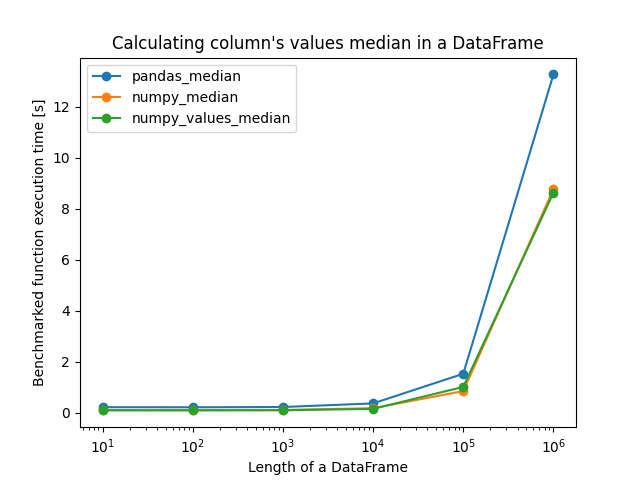

In [ ]:
def pandas_median(df):
    return df.iloc[:, 0].median()


def numpy_median(df):
    return np.median(df.iloc[:, 0])


def numpy_values_median(df):
    return np.median(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_median, numpy_median, numpy_values_median],
    title="Calculating column's values median in a DataFrame",
    df_size_power=6
)

### 3. Dropping duplicates

Calculating results for function duplicated using DataFrame with 10 elements.
Calculating results for function duplicated using DataFrame with 100 elements.
Calculating results for function duplicated using DataFrame with 1000 elements.
Calculating results for function duplicated using DataFrame with 10000 elements.
Calculating results for function duplicated using DataFrame with 100000 elements.
Calculating results for function duplicated using DataFrame with 1000000 elements.
Calculating results for function drop_duplicates using DataFrame with 10 elements.
Calculating results for function drop_duplicates using DataFrame with 100 elements.
Calculating results for function drop_duplicates using DataFrame with 1000 elements.
Calculating results for function drop_duplicates using DataFrame with 10000 elements.
Calculating results for function drop_duplicates using DataFrame with 100000 elements.
Calculating results for function drop_duplicates using DataFrame with 1000000 elements.
Calc

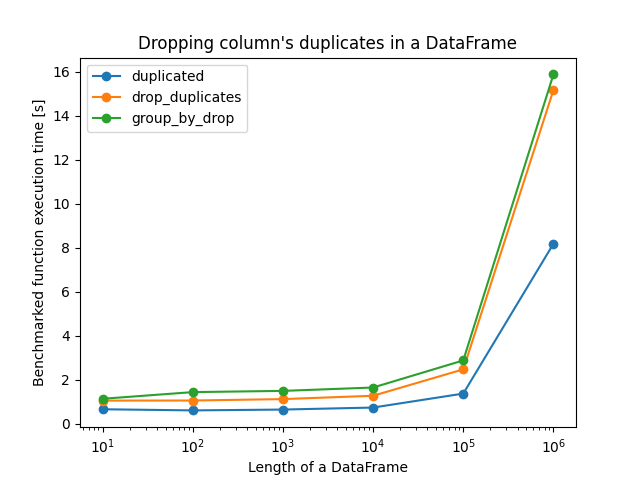

In [ ]:
def duplicated(df):
    return df[~df.iloc[:, 0].duplicated(keep="first")].reset_index(drop=True)


def drop_duplicates(df):
    subset_column = df.columns[0]
    return df.drop_duplicates(subset=subset_column, keep="first").reset_index(drop=True)


def group_by_drop(df):
    return df.groupby(df.iloc[:, 0], as_index=False, sort=False).first()


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[duplicated, drop_duplicates, group_by_drop],
    title="Dropping column's duplicates in a DataFrame",
    df_size_power=6
)

### 4. Getting unique values

Calculating results for function pandas_unique using DataFrame with 10 elements.
Calculating results for function pandas_unique using DataFrame with 100 elements.
Calculating results for function pandas_unique using DataFrame with 1000 elements.
Calculating results for function pandas_unique using DataFrame with 10000 elements.
Calculating results for function pandas_unique using DataFrame with 100000 elements.
Calculating results for function pandas_unique using DataFrame with 1000000 elements.
Calculating results for function numpy_unique using DataFrame with 10 elements.
Calculating results for function numpy_unique using DataFrame with 100 elements.
Calculating results for function numpy_unique using DataFrame with 1000 elements.
Calculating results for function numpy_unique using DataFrame with 10000 elements.
Calculating results for function numpy_unique using DataFrame with 100000 elements.
Calculating results for function numpy_unique using DataFrame with 1000000 elements.
Calc

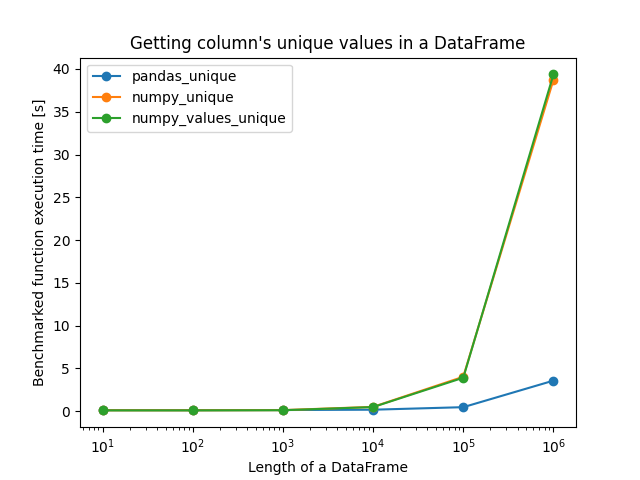

In [ ]:
def pandas_unique(df):
    return df.iloc[:, 0].unique()


def numpy_unique(df):
    return np.unique(df.iloc[:, 0])


def numpy_values_unique(df):
    return np.unique(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_unique, numpy_unique, numpy_values_unique],
    title="Getting column's unique values in a DataFrame",
    df_size_power=6
)

### 5. Sorting a column

Calculating results for function pandas_sort using DataFrame with 10 elements.
Calculating results for function pandas_sort using DataFrame with 100 elements.
Calculating results for function pandas_sort using DataFrame with 1000 elements.
Calculating results for function pandas_sort using DataFrame with 10000 elements.
Calculating results for function pandas_sort using DataFrame with 100000 elements.
Calculating results for function pandas_sort using DataFrame with 1000000 elements.
Calculating results for function numpy_sort using DataFrame with 10 elements.
Calculating results for function numpy_sort using DataFrame with 100 elements.
Calculating results for function numpy_sort using DataFrame with 1000 elements.
Calculating results for function numpy_sort using DataFrame with 10000 elements.
Calculating results for function numpy_sort using DataFrame with 100000 elements.
Calculating results for function numpy_sort using DataFrame with 1000000 elements.
Calculating results for func

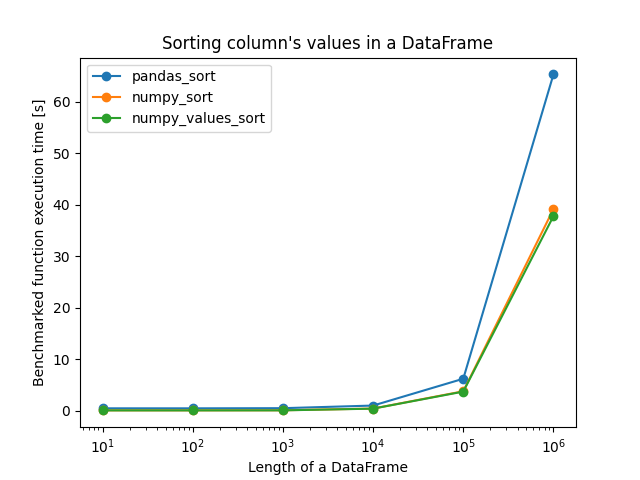

In [ ]:
def pandas_sort(df):
    return df.iloc[:, 0].sort_values()


def numpy_sort(df):
    return np.sort(df.iloc[:, 0])


def numpy_values_sort(df):
    return np.sort(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_sort, numpy_sort, numpy_values_sort],
    title="Sorting column's values in a DataFrame",
    df_size_power=6
)

### 5. Calculating a new column based on existing ones

Calculating results for function add_regular using DataFrame with 10 elements.
Calculating results for function add_regular using DataFrame with 100 elements.
Calculating results for function add_regular using DataFrame with 1000 elements.
Calculating results for function add_regular using DataFrame with 10000 elements.
Calculating results for function add_regular using DataFrame with 100000 elements.
Calculating results for function add_regular using DataFrame with 1000000 elements.
Calculating results for function add_df_values using DataFrame with 10 elements.
Calculating results for function add_df_values using DataFrame with 100 elements.
Calculating results for function add_df_values using DataFrame with 1000 elements.
Calculating results for function add_df_values using DataFrame with 10000 elements.
Calculating results for function add_df_values using DataFrame with 100000 elements.
Calculating results for function add_df_values using DataFrame with 1000000 elements.
Calculatin

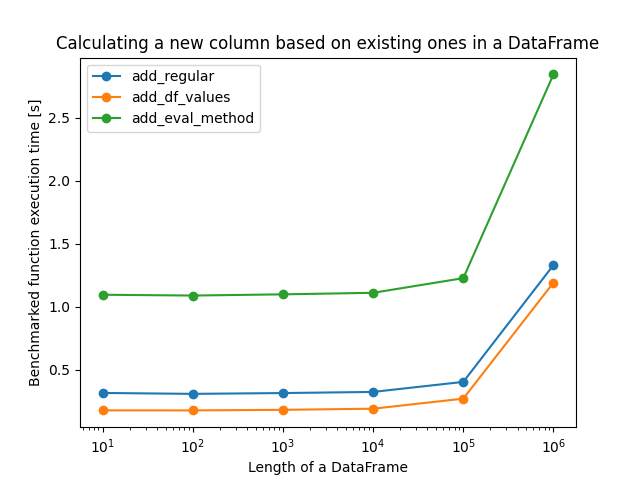

In [ ]:
def add_regular(df):
    df["ExtraColumn"] = df.iloc[:, 0] * df.iloc[:, 1]


def add_df_values(df):
    df["ExtraColumn"] = df.iloc[:, 0].values * df.iloc[:, 1].values


def add_eval_method(df):
    df.eval("ExtraColumn = ColumnA * ColumnB", inplace=True)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[add_regular, add_df_values, add_eval_method],
    title="Calculating a new column based on existing ones in a DataFrame",
    df_size_power=6
)